### Web Scraping e Análise de dados

#### Esse é um projeto do Curso de Web Scraping e Análise de dados da Data Science Academy, que serviu como parte do meu estudo para aplicar Web Scraping no dia-a-dia nas minhas análises e pretendo avançar nesse projeto e criar novas visões futuras, como: pesquisas de palavras-chave, análise de mercado e outras análises que forem possíveis criar para os tomadores de decisão

É um projeto que fiz algumas alterações no código e adicionei novas colunas para crescer as análises. Percebi o quanto é legal essa parte de análise dos dados extraídos por web scraping, até por que algumas das tags e classes do website indeed, tinham sido alteradas, então tive que colocar em prática o HTML e identificar as div, class e tags das colunas que estão sendo feitas a análises.

A ideia desse projeto é através do framework Webdriver - Selenium, extrair dados do website Indeed, vagas que contenham Data Science e com a localidade no Brasil, e usando a biblioteca BeautifulSoup para extrair os elementos do HTML, inserindo os dados em um DataFrame para assim fazer as análises dos dados e criar gráficos para a visualização. 

Também foi possível fazer a análise das skills mais buscadas (nos sites filtrados) usando o pacote NLTK para o uso das stopwords e word tokenize

In [1]:
# imports
import bs4 
import selenium
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import Counter
import sys
%matplotlib inline

# import do pacote NLTK para o processamento de linguagem natural
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [2]:
# Definição do path onde esta instalado o navegador e o chromedriver

options = webdriver.ChromeOptions()
options.binary_location = r"C:\Program Files\BraveSoftware\Brave-Browser\Application\brave.exe"
chrome_driver_path = r"C:\Users\Cesar\Music\Formacao-Cientista-Dados\webscraping-indeed\chromedriver.exe"

browser = webdriver.Chrome(chrome_driver_path, chrome_options = options)

c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  import sys
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [3]:
# Criação do dataframe para receber os dados
dados = pd.DataFrame(columns = ["Título", "Localidade", "Empresa", "Salario", "Tipo_Pesquisa", "Desc", "Avaliações"])

In [4]:
# Abre a conexão com o site e faz a pesquisa dos termos
#browser.get("https://br.indeed.com/jobs?q=data%20science&l=Home-Office")
browser.get("https://br.indeed.com/jobs?q=data%20science&l=Brasil")
browser.implicitly_wait(60)

In [5]:
# Gravamos o resultado do scraping
resultado = browser.find_elements_by_class_name("result")

c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  


In [6]:
#Tipo do resultado
type(resultado)

list

In [7]:
# O resultado retornado é apenas os elementos web.
# Vamos extrair o texto desses elementos usando o hmtl.parser
resultado

[<selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="ac60c7d8-540a-4c92-adda-99b4d70540b8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="5e8e8462-a73b-49ae-8d7a-0d2137274777")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="8cf71cc3-5ac9-4951-9238-6df40fa5424b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="279e35d0-cf8f-4605-9f97-8b42cbc7f3d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="6fca2da4-2e24-4461-8c25-ae45e27353fa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="4e9353a0-cbfe-43f2-8e14-c7b57b63ab3c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4801f17682a754565b9162831553ae32", element="2eb422ac-3f73-45d1-aa1b-d0

In [8]:
# Loop pelos resultados do scraping e extração dos dados nas tags HTML do nosso interesse

for vaga in resultado:
    
    # Vamos coletar o elemento HTML interno
    result_html = vaga.get_attribute('innerHTML')
    
    # Aqui fazemos o parser do código HTML
    soup = BeautifulSoup(result_html, 'html.parser')
    
    # Aqui buscamos as tags para análise
    # Usando blocos try/except para evitar erros na execução, no caso de uma informação não estar disponível na vaga
    
    # Título da vaga
    try:
        title = soup.find("h2", class_ = "jobTitle").text.replace('\n', '')
    except:
        title = 'None'
        
    # Localidade
    try:
        location = soup.find(class_ = "companyLocation").text
    except:
        location = 'None'
        
    # Empresa
    try:
        company = soup.find(class_ = "companyName").text.replace('\n', '').strip()
    except:
        company = 'None'
        
    # Salário
    try:
        salary = soup.find("a", class_ = "salary").text.replace('\n','').strip()
    except:
        salary = 'None'
        
        
    # Tipo de pesquisa (orgânica ou patrocinada)
    try:
        sponsored = soup.find("a", class_ = "sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = 'Organic'
        
    # Avaliações Empresa
    try:
        stars = soup.find("span", class_ = "ratingNumber").get_text() #text.replace(',', '.').strip()
    except:
        stars = '0'
        
    # Descrição da vaga
    try:
        job_desc = soup.find("tr", class_ = "underShelfFooter").text.replace('\n', '').strip()
    except:
        job_desc = 'None'
    
    # Gravamos o resultado em nosso dataframe
    dados = dados.append({"Título":title,
                          "Localidade": location,
                          "Empresa": company,
                          "Salario": salary,
                          "Tipo_Pesquisa" : sponsored,
                          "Desc": job_desc,
                          "Avaliações": stars},
                          #"Benefícios": beneficios},
                          ignore_index = True)

In [9]:
dados.shape

(15, 7)

In [10]:
dados.head(285)

,Título,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc,Avaliações
0,Data Science Intern,Home office,Big Data,None,Organic,Conhecimentos de estatística e probabilidade a...,0
1,Data Scientist Jr,"Home office in São Paulo, SP",Remessa Online,None,Organic,Como será o dia a dia.Desenvolver decisores no...,"3,7"
2,Data Science,Home office,Cielo,None,Organic,"Experiência em analytics, data science, ecomme...","4,2"
3,Data Science Lead,Home office,PIER.,None,Organic,Conhecimento em metodologias de Data Science e...,0
4,Estágio em Data Science e Analytics,"São Paulo, SP",TransUnion,None,Organic,Conhecimento em programação SQL e R (desejável...,"3,8"
5,novaData Scientist - LATAM,"Home office in São Paulo, SP",Signifyd,None,Organic,Designing experiments and collecting data.Bach...,0
6,DATA SCIENCE SPECIALIST - SUMARE,"Sumaré, SP",OEmprego,None,Organic,Proven knowledge in Data processes – data tran...,0
7,Data Scientist - Cientista de Dados,"Home office in São Paulo, SP",Capim,None,Organic,Mínimo de experiência de 3 anos em data scienc...,0
8,novaEstagiário de Data Science,"Home office in Fortaleza, CE",FortBrasil,None,Organic,Desejável Conhecimento em Power BI;Convênio co...,"4,3"
9,Analista de Data Science,"São Paulo, SP",Konecta Brasil,None,Organic,Experiência com Python/R e SQL para análise e ...,"3,6"


In [11]:
# Salvando os dados em disco
dados.to_csv('resultado/dados.csv', encoding = "utf-8", index = False)

## Análise de dados

In [12]:
# Carregando o dadaset
df = pd.read_csv("resultado/dados.csv", encoding = "utf-8")

In [13]:
df.shape

(15, 7)

In [14]:
df.head()

,Título,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc,Avaliações
0,Data Science Intern,Home office,Big Data,None,Organic,Conhecimentos de estatística e probabilidade a...,0
1,Data Scientist Jr,"Home office in São Paulo, SP",Remessa Online,None,Organic,Como será o dia a dia.Desenvolver decisores no...,"3,7"
2,Data Science,Home office,Cielo,None,Organic,"Experiência em analytics, data science, ecomme...","4,2"
3,Data Science Lead,Home office,PIER.,None,Organic,Conhecimento em metodologias de Data Science e...,0
4,Estágio em Data Science e Analytics,"São Paulo, SP",TransUnion,None,Organic,Conhecimento em programação SQL e R (desejável...,"3,8"


In [15]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
df["Tipo_Pesquisa"].value_counts()

Organic    15
Name: Tipo_Pesquisa, dtype: int64

### Quais empresas tem o maior número de vagas listadas ?

In [16]:
# Agrupar o datasert por empresa
grupo = df.groupby("Empresa").count()["Título"].sort_values(ascending = False)[:20]

In [17]:
# Visualiza os dados
grupo.head()

Empresa
Cielo         2
Big Data      1
Capim         1
FortBrasil    1
IBM           1
Name: Título, dtype: int64

<AxesSubplot:xlabel='Empresa'>

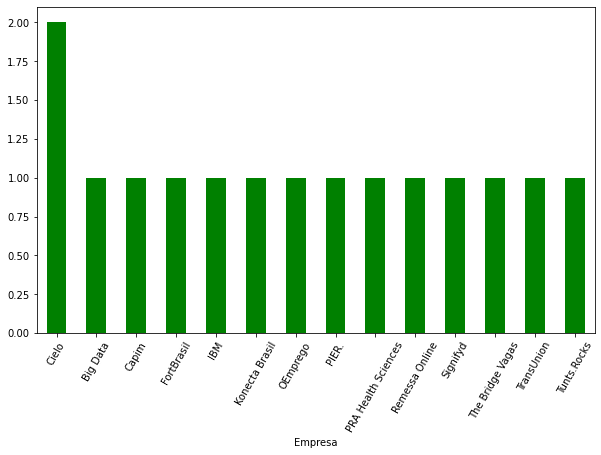

In [18]:
# Gráfico 
grupo.plot(kind = "bar", figsize = (10,6), color = "green", rot = 60)

### Quais os skills mais comuns nas descrições das vagas ?

In [19]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [20]:
# Aqui iremos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [21]:
# Aqui iremos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [22]:
# Aplicamos a função de limpeza na coluna de descrição da vaga
desc_vagas = df["Desc"].apply(limpa_dados)

In [23]:
# Visualizamos os dados
desc_vagas.head()

0    [conhecimentos, estatística, probabilidade, ní...
1    [dia, decisores, produto, compliance, crm, mei...
2    [experiência, analytics, data, science, ecomme...
3    [conhecimento, metodologias, data, science, ma...
4    [conhecimento, programação, sql, desejável, in...
Name: Desc, dtype: object

In [24]:
# Vamos sumarizar as descrições 
desc_itens = desc_vagas.apply(Counter).sum().items()

In [25]:
# Ordenar os resultados
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [26]:
# Criamos uma série
desc_itens_series = pd.Series({k : v for k, v in desc_itens})

In [27]:
# Visualizando os dados com a contagem de palavras mais frequentes 
desc_itens_series.head(15)

data           31
vagas          16
visualizar     15
todas          15
emprego        15
empregos       15
salário        15
salários       15
science        13
paulobusca      7
remotobusca     6
scientist       6
paulo           6
principais      6
perguntas       6
dtype: int64

In [28]:
# Aqui iremos criar uma lista de skills e pesquisar como eles aparem nas descrições
skills = ["python", "statistics", "analytics", "business", "projects", "develop",
          "estatística", "r", "sql", "data analysis", "machine learning", "power bi",
          "data science", "python/r", "bi", "estatisticas", "análise", "scientist",
           "probabilidade", "spark", "hadoop"]

In [29]:
# Filtramos a séries com os skills
filtro_skills = desc_itens_series.filter(items = skills)

<AxesSubplot:>

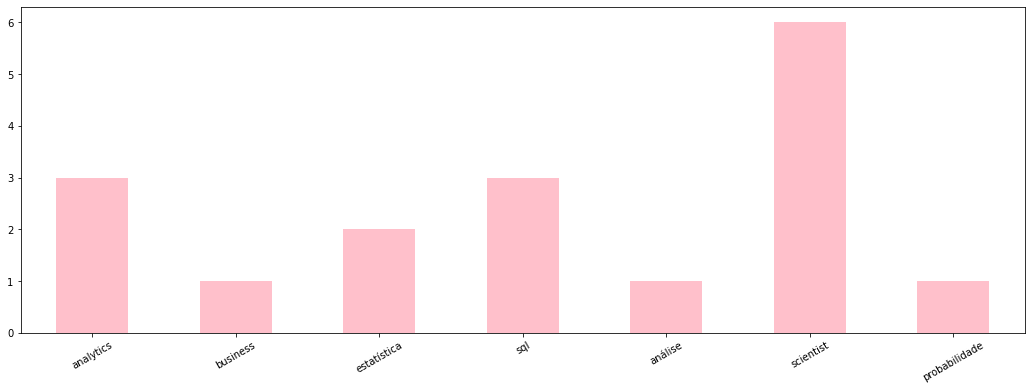

In [30]:
# Criamos o plot
filtro_skills.plot(kind = 'bar', figsize = (18, 6), color = "pink", rot = 30)